In [48]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Frequency of Diabetes in Pima Indian Women Over the Age of 21**


**INTRODUCTION**

Diabetes is a disease in which the human body is no longer able to control the delicate balance of sugar in the bloodstream, which can have serious implications. It is split up into three main types, each with their own causes and risk factors. Type 1 diabetes happens when the pancreas no longer produces insulin, a protein that will decrease the amount of glucose (sugar) in the blood; while the cause of type 1 diabetes isn’t yet known, there is some indication that there might be a significant hereditary component. In type 2 diabetes the body becomes resistant to its own insulin and while the cause is still mostly unknown, excess body weight, high blood pressure, genetics, and age are all factors that contribute. Gestational diabetes is similar to type 2 diabetes, the main difference being that pregnancy hormones cause its onset(1).

We seek to explore the following question: Can we determine if a woman has diabetes based on predictors such as blood glucose levels, blood pressure, number of pregnancies, insulin levels, BMI, age, skin thickness, and genetics (called diabetes pedigree function)? To answer this question, we use data collected by the National Institute of Diabetes and Digestive and Kidney Diseases. The particular data set surveyed women over the age of 21 of Pima Indian heritage(2).

**METHODOLOGY**

We plan to use only the most relevant columns which help us conclude whether or not a person has diabetes or not. We will conduct our data analysis by comparing variables and their distribution of positive versus negative results of diabetes diagnosis. We will isolate each of the variables in turn, and compare the two outcomes.

In [ ]:
set.seed(41)
url <- "https://raw.githubusercontent.com/ehaniak/Group41/main/data/diabetes.csv"
diabetes <- read_csv(url)%>% 
    mutate(Outcome = as_factor(Outcome))

In [ ]:
diabetes

 ##### Table 1: Diabetes dataset. All predictors shown

In [ ]:
summary_of_data_diabetes_means <- summarize(diabetes,
                            mean_Pregnancies = mean(Pregnancies), 
                            mean_Glucose = mean(Glucose),
                            mean_BloodPressure = mean(BloodPressure),
                            mean_SkinThickness = mean(SkinThickness),
                            mean_Insulin = mean(Insulin),
                            mean_BMI = mean(BMI),
                            mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction),
                            mean_Age = mean(Age))
                                                  
summary_of_data_diabetes_means

##### Table 2: Diabetes dataset summary of means

In [49]:
summary_of_data_diabetes_max <- summarize(diabetes, 
                                        max_Pregnancies = max(Pregnancies),
                                         max_Glucose = max(Glucose),
                                         max_BloodPressure = max(BloodPressure),
                                         max_SkinThickness = max(SkinThickness),
                                         max_Insulin = max(Insulin),
                                         max_BMI = max(BMI),
                                         max_DiabetesPedigreeFunction = max(DiabetesPedigreeFunction),
                                         max_Age = max(Age))
                                       
summary_of_data_diabetes_max

max_Pregnancies,max_Glucose,max_BloodPressure,max_SkinThickness,max_Insulin,max_BMI,max_DiabetesPedigreeFunction,max_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,199,122,99,846,67.1,2.42,81


##### Table 3: Diabetes dataset maximum

In [50]:
summary_of_data_diabetes_min <- summarize(diabetes, 
                                        min_Pregnancies = min(Pregnancies),
                                         min_Glucose = min(Glucose),
                                         min_BloodPressure = min(BloodPressure),
                                         min_SkinThickness = min(SkinThickness),
                                         min_Insulin = min(Insulin),
                                         min_BMI = min(BMI),
                                         min_DiabetesPedigreeFunction = min(DiabetesPedigreeFunction),
                                         min_Age = min(Age))
                                       
summary_of_data_diabetes_min

min_Pregnancies,min_Glucose,min_BloodPressure,min_SkinThickness,min_Insulin,min_BMI,min_DiabetesPedigreeFunction,min_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0.078,21


##### Table 4: Diabetes dataset minimum

Warning message:
“Ignoring unknown parameters: binwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



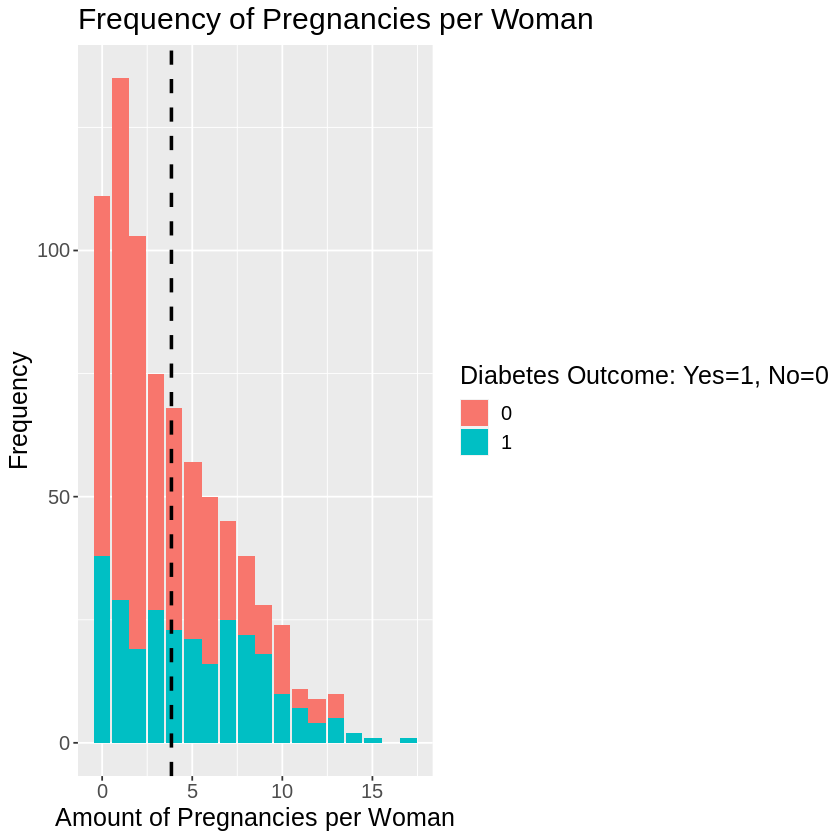

In [51]:
diabetes_hist_Pregnancies <- ggplot(diabetes, aes(x = Pregnancies, fill = (Outcome))) +
    geom_histogram() +
    stat_count(binwidth = 0.005) +
    geom_vline(xintercept = 3.845052, linetype = "dashed", size = 1) +
    labs(x = "Amount of Pregnancies per Woman", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
    theme(text = element_text(size = 15)) + 
    ggtitle("Frequency of Pregnancies per Woman")

diabetes_hist_Pregnancies

##### Graph 1: Amount of Pregnancies per woman, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. The fewer the pregnancies, the bigger the difference. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



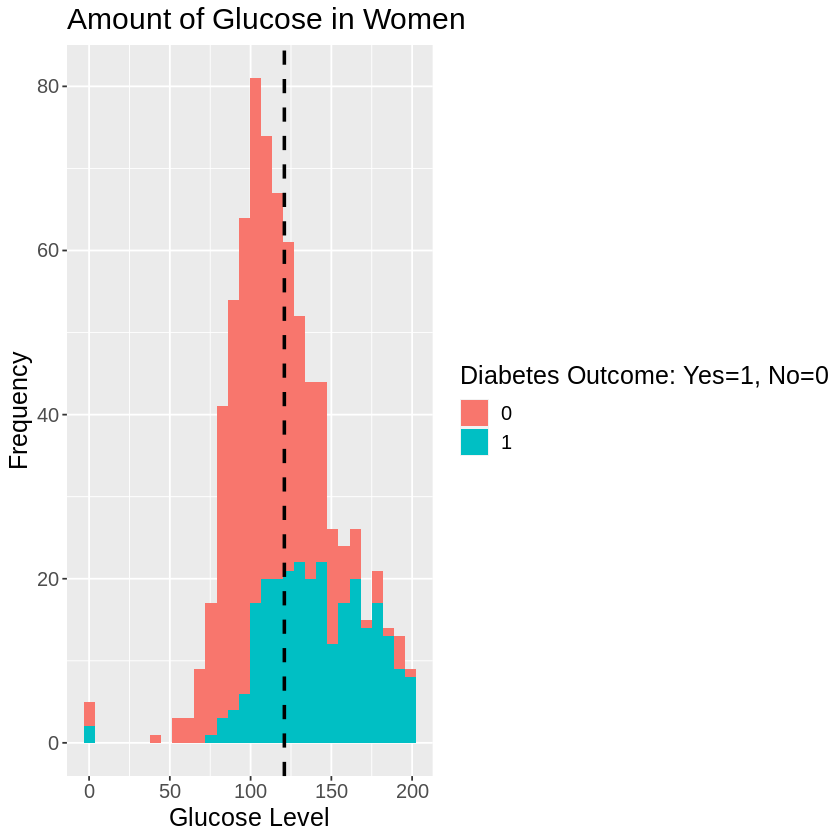

In [52]:
diabetes_hist_Glucose <- ggplot(diabetes, aes(x = Glucose, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 120.8945, linetype = "dashed", size = 1) +
    labs(x = "Glucose Level", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Glucose in Women")

diabetes_hist_Glucose

##### Graph 2: Glucose Levels in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. From a glucose level of about 80-140, there is a significantly higher amount of women without diabetes, where there is a more equal amount of women with/without diabetes from a glucose level of about 150+.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



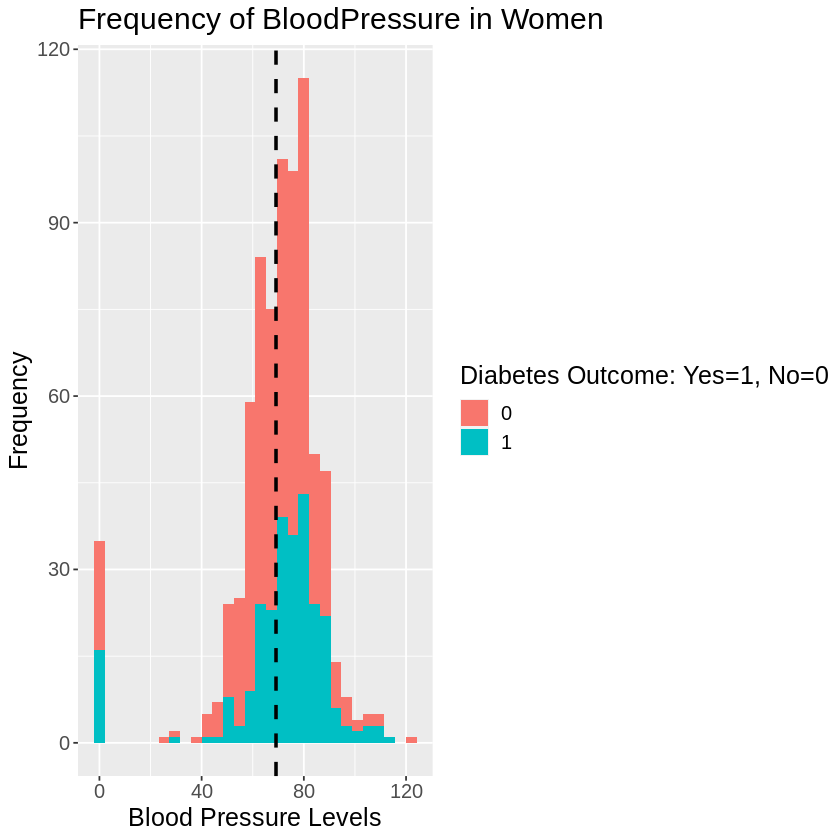

In [53]:
diabetes_hist_BloodPressure <- ggplot(diabetes, aes(x = BloodPressure, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 69.10547, linetype = "dashed", size = 1) +
    labs(x = "Blood Pressure Levels", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) +
    ggtitle("Frequency of BloodPressure in Women")

diabetes_hist_BloodPressure

##### Graph 3: Blood Pressure Levels in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. From a blood pressure level of about 60-80, there is a significantly higher amount of women without diabetes, where there is a more equal amount everywhere else.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



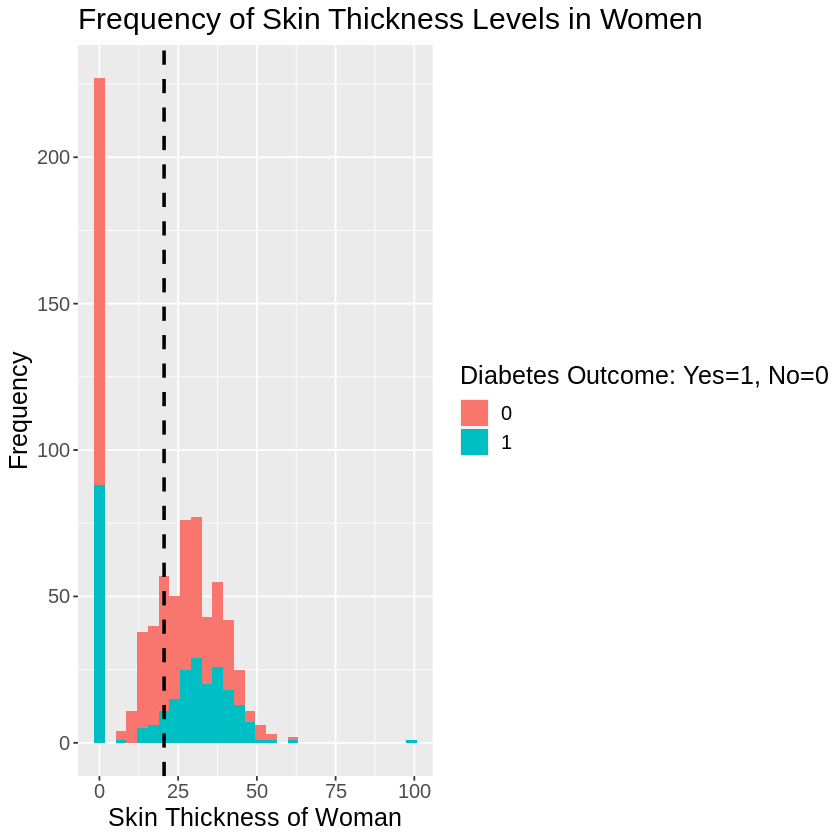

In [54]:
diabetes_hist_SkinThickness <- ggplot(diabetes, aes(x = SkinThickness, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = 20.53646, linetype = "dashed", size = 1) +
    labs(x = "Skin Thickness of Woman", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) +
    ggtitle("Frequency of Skin Thickness Levels in Women")

diabetes_hist_SkinThickness

##### Graph 4: Skin Thickness Levels in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. The skin thickness level seems to have a big effect around 25-30, and less so everywhere else.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



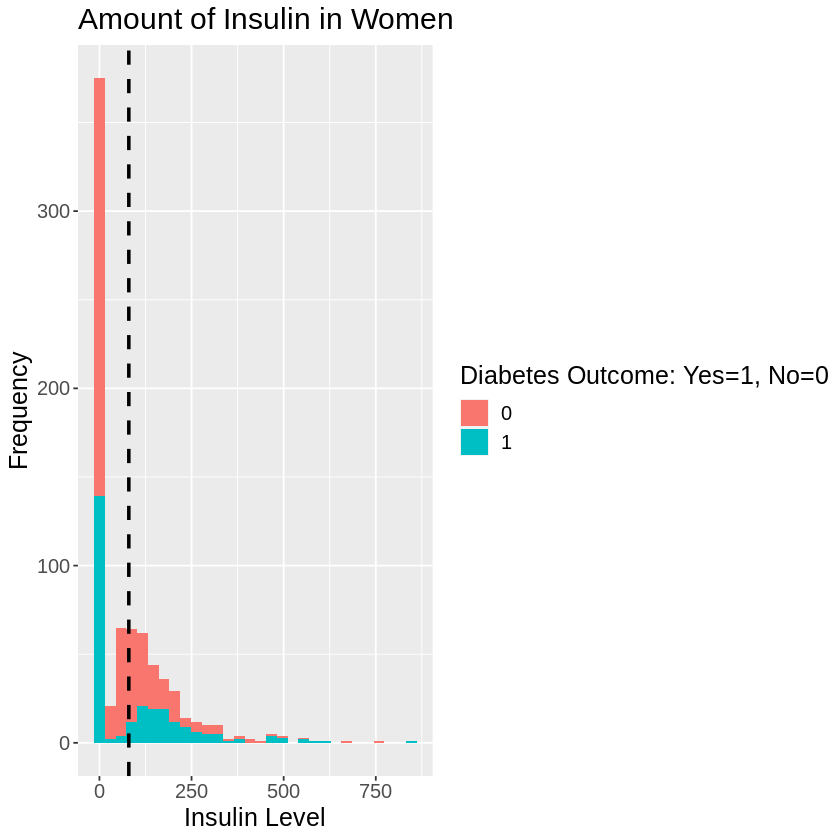

In [55]:
diabetes_hist_Insulin <- ggplot(diabetes, aes(x = Insulin, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 79.79948, linetype = "dashed", size = 1) +
    labs(x = "Insulin Level", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Insulin in Women")

diabetes_hist_Insulin

##### Graph 5: Insulin Levels in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. Low Insulin levels seem to correlate with higher frequency of women with diabetes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



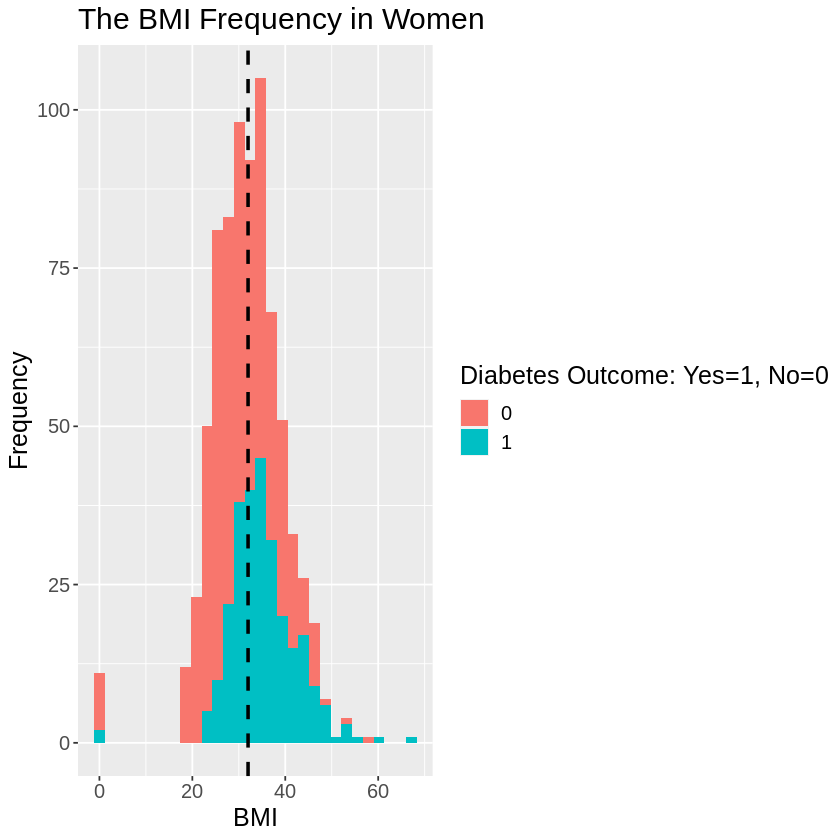

In [56]:
diabetes_hist_BMI <- ggplot(diabetes, aes(x = BMI, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 31.99258, linetype = "dashed", size = 1) +
    labs(x = "BMI", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The BMI Frequency in Women")

diabetes_hist_BMI

##### Graph 6: BMI Score in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. High BMI levels seem to have a correlation with diabetes in women. Especially above ~50+.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



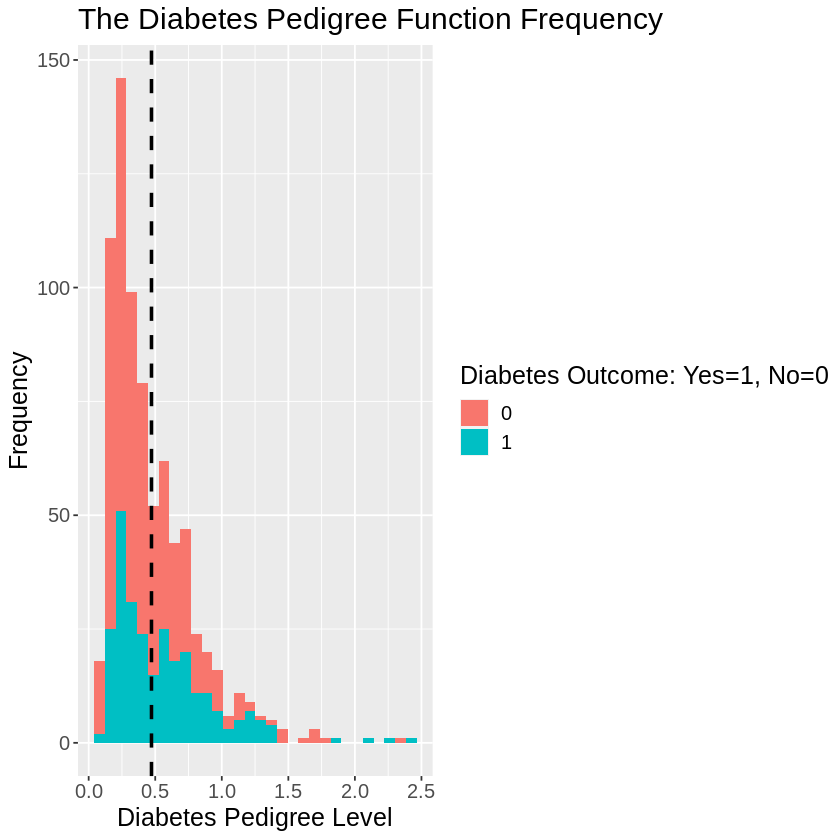

In [57]:
diabetes_hist_DiabetesPedigreeFunction <- ggplot(diabetes, aes(x = DiabetesPedigreeFunction, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 0.4718763, linetype = "dashed", size = 1) +
    labs(x = "Diabetes Pedigree Level", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Diabetes Pedigree Function Frequency")

diabetes_hist_DiabetesPedigreeFunction

##### Graph 7: Diabetes Pedigree in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. Low Pedigree seems to correlate with highetened amounts of women with diabetes. 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



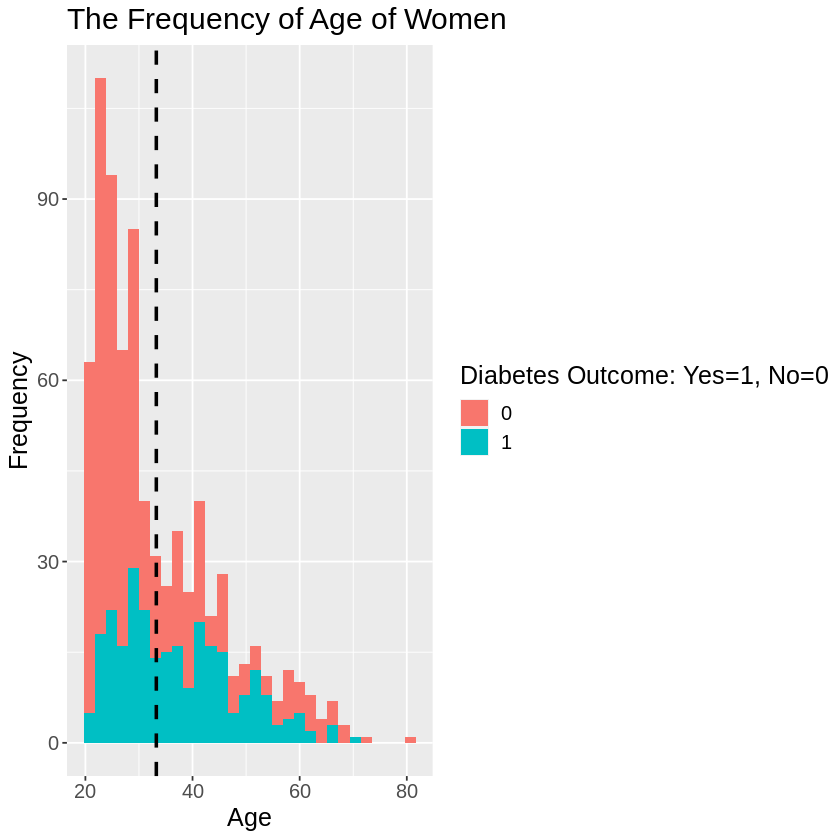

In [58]:
diabetes_hist_Age <- ggplot(diabetes, aes(x = Age, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = 33.24089, linetype = "dashed", size = 1) +
    labs(x = "Age", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Frequency of Age of Women")

diabetes_hist_Age

##### Graph 8: Age in Women, coloured by diabetes diagnosis

As we see above, there is a significant difference in this graph. There are far less women under 30 with diabetes than there are for women ages 30 and higher.


**ClASSIFICATION PREDICTIVE MODEL**

In [59]:
filtered_diabetes <- select(diabetes, SkinThickness, Insulin, Outcome)
filtered_diabetes

SkinThickness,Insulin,Outcome
<dbl>,<dbl>,<fct>
35,0,1
29,0,0
0,0,1
⋮,⋮,⋮
23,112,0
0,0,1
31,0,0


Table 4: SkinThickness and Insulin 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



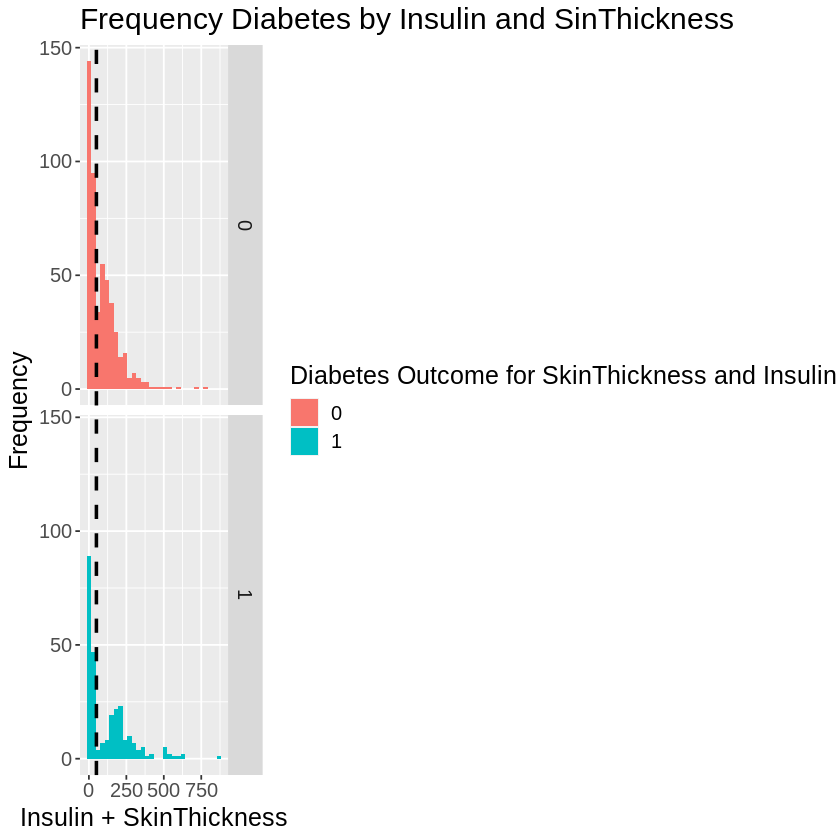

In [60]:
diabetes_relationships <- mutate(filtered_diabetes, 
                     relative_accuracy = (Insulin + SkinThickness))

diabetes_hist_compare <- ggplot(diabetes_relationships, aes(x = relative_accuracy, fill = as_factor(Outcome))) +
    geom_histogram(position = "identity") + 
    facet_grid(rows = vars(Outcome)) +
    geom_vline(xintercept = ((79.79948+20.53646)/2), linetype = "dashed", size = 1) +
    labs(x = "Insulin + SkinThickness", 
         y = "Frequency", 
         fill = "Diabetes Outcome for SkinThickness and Insulin") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Frequency Diabetes by Insulin and SinThickness") 

diabetes_hist_compare 

In [61]:
set.seed(41)
diabetes_split <- initial_split(prop = 0.75, strata = Outcome, data = diabetes)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)


In [62]:
set.seed(41)
diabetes_recipe <- recipe(Outcome ~ ., data = diabetes_training)%>% 
    step_scale(all_predictors())%>% 
    step_center(all_predictors())
diabetes_knn <- nearest_neighbor(weight_func = "rectangular", neighbors =tune())%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [63]:
set.seed(41)
diabetes_vfold <- vfold_cv(diabetes_training, v = 5, strata = Outcome)

tibble_k <- tibble(neighbors = seq(1,100,4))

diabetes_fit <- workflow()%>%
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn)%>% 
    tune_grid(resamples= diabetes_vfold, grid = tibble_k) 

diabetes_accuracies <- diabetes_fit %>% 
    collect_metrics()%>%
    filter(.metric == "accuracy")

diabetes_accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6874213,5,0.01789800,Model01
5,accuracy,binary,0.7152174,5,0.01588594,Model02
9,accuracy,binary,0.7326837,5,0.01792579,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
89,accuracy,binary,0.7205397,5,0.007902628,Model23
93,accuracy,binary,0.7153373,5,0.009565629,Model24
97,accuracy,binary,0.7135982,5,0.008592798,Model25


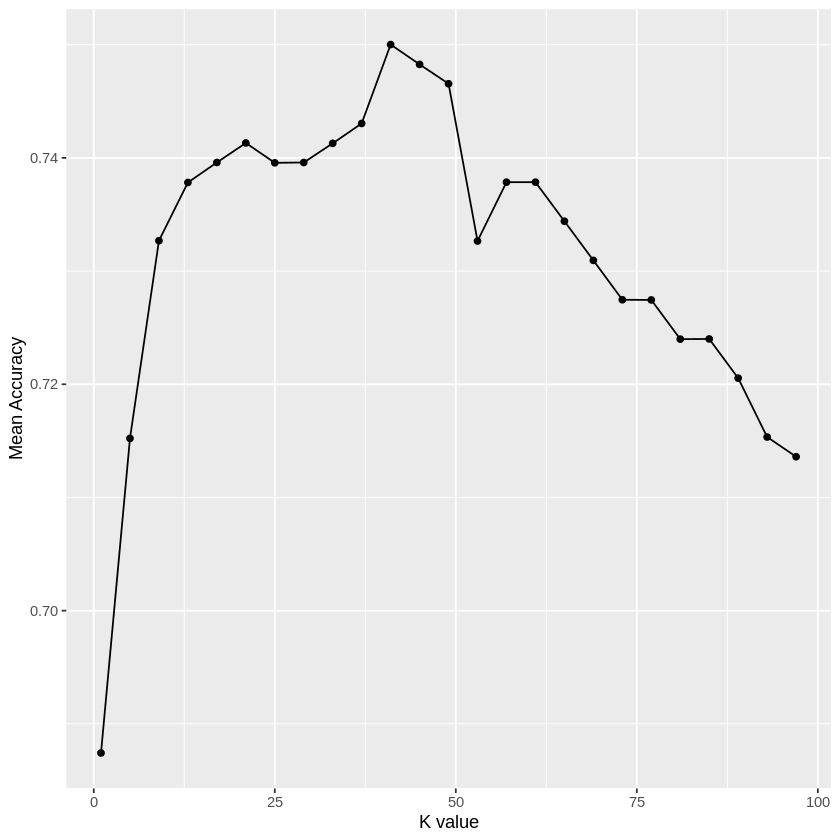

In [64]:
set.seed(41)
accuracy_diabetes_plot <- diabetes_accuracies %>%
    ggplot(aes(x= neighbors, y= mean))+
    geom_point()+
    geom_line()+ 
    labs(x = "K value", y= "Mean Accuracy")
accuracy_diabetes_plot

In [65]:
set.seed(41)
diabetes_knn_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 41)%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_fitted_final <- workflow()%>% 
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn_final)%>% 
    fit(data = diabetes_training)
diabetes_fitted_final


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~41, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2465278
Best kernel: rectangular
Best k: 41

In [66]:
set.seed(41)
diabetes_predictions <- predict(diabetes_fitted_final, diabetes_testing)%>%
    bind_cols(diabetes_testing)
diabetes_metrics <- diabetes_predictions %>% 
    metrics(truth = Outcome, estimate = .pred_class) %>% 
    filter(.metric == "accuracy")
diabetes_metrics
diabetes_confusion <- diabetes_predictions %>% 
  conf_mat(truth = Outcome, estimate = .pred_class)
diabetes_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7552083


          Truth
Prediction   0   1
         0 117  39
         1   8  28

Truth,Predicted,Values
<fct>,<fct>,<dbl>
1,1,28
1,0,39
0,1,8
0,0,117


Warning message:
“Ignoring unknown aesthetics: fill”


$title
[1] "Confusion Matrix Visualization"

attr(,"class")
[1] "labels"

Warning message:
“Use of `dataframe_for_visualization$Values` is discouraged. Use `Values` instead.”
Warning message:
“Use of `dataframe_for_visualization$Values` is discouraged. Use `Values` instead.”


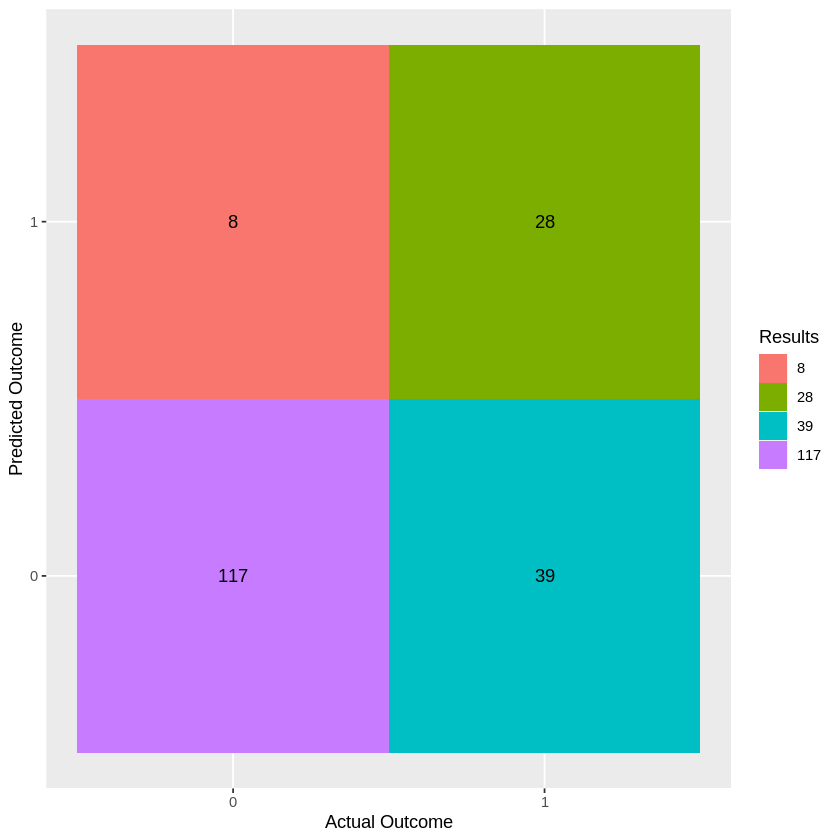

In [67]:
set.seed(41)
    Truth <- c(1, 1, 0, 0 )
Predicted <- c(1, 0, 1, 0)
   Values <- c(28, 39, 8, 117)

dataframe_for_visualization <- data.frame(Truth, Predicted, Values)%>% 
    mutate(Truth = as_factor(Truth),
          Predicted = as_factor(Predicted))
dataframe_for_visualization

vizualization_of_conf_mat <- ggplot(dataframe_for_visualization, aes(x= Truth, y = Predicted, fill = as_factor(Values)))+
geom_tile()+
geom_text(aes(fill = as.factor(dataframe_for_visualization$Values), label = dataframe_for_visualization$Values))+ 
labs(x= "Actual Outcome", y= "Predicted Outcome",fill = "Results")
ggtitle("Confusion Matrix Visualization")

vizualization_of_conf_mat

#### Red:Predicted Diabetes, Actually not Diabetes
#### Green:Predicted Diabetes, Actually Diabetes
#### Purple:Predicted not Diabetes, Actually not Diabetes
#### Blue: Predicted not Diabetes, Actually Diabetes